## 📊 Air Quality Prediction Starter Notebook 🌱—
By Olubunmi Oluwaseun

Welcome to the Air Quality Prediction Competition! Here's what you'll find:

- **Step 1: Understand the Dataset**
- **Step 2: Load and Inspect the Data**
- **Step 3: Exploratory Data Analysis**
- **Step 4: Feature Engineering**
- **Step 5: Train-Validation Split**
- **Step 6: Baseline Modeling**
- **Step 7: Advanced Modeling**
- **Step 8: Validation & Cross-Validation**
- **Step 9: Generate Predictions**
- **Step 10: Submission**

## Step 1: Understand the Dataset
We have:

**1. Training Data (Train.csv):**
- Contains sensor readings (Temperature, Humidity, MQ7_analog, MQ9_analog, MG811_analog, MQ135_analog) and the corresponding CO2 levels (CO2).
- Also includes a column for the device name (device_name), which is always "alpha" in the provided data.

**2. Test Data (test.csv):**
- Contains only sensor readings (no CO2 values).
- Used to generate predictions for submission.

**3. Sample Submission (SampleSubmission.csv):**
- A template for the submission file with ID and CO2 columns.
- All CO2 values are initialized to 0.

**4. Variable Descriptions (Variable Description.csv):**
- Provides details about each feature in the dataset.

## Importing Libraries
In this section, we import the essential libraries needed for data analysis, visualization, and modeling:

- `pandas`: For data manipulation and analysis 🐼.
- `numpy`: For numerical computations 🔢.
- `matplotlib.pyplot`: To create static, interactive, and publication-quality visualizations 📊.
- `seaborn`: For beautiful and informative statistical graphics 🎨.
- `sklearn.model_selection`: To split the data into training and validation sets 🎯.
- `sklearn.ensemble.RandomForestRegressor`: A robust machine learning algorithm for regression tasks 🌳.
- `sklearn.metrics.mean_squared_error`: To evaluate the performance of our model using RMSE 📏.
- `xgboost`: For gradient boosting regression
  
These libraries form the backbone of our analysis and modeling pipeline. Let's get started!

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Step 2: Load and Inspect the Data
Let’s load the datasets and inspect their structure.

In [6]:
# Load datasets
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('SampleSubmission.csv')

# Inspect training data
print("Training Data:")
print(train_data.head())
print(train_data.info())
print(train_data.describe())

# Inspect test data
print("\nTest Data:")
print(test_data.head())
print(test_data.info())
print(test_data.describe())

# Inspect sample submission
print("\nSample Submission:")
print(sample_submission.head())

Training Data:
          ID  Temperature  Humidity  MQ7_analog  MQ9_analog  MG811_analog  \
0  ID_000001       28.975    74.475      2480.0      3476.5        1572.0   
1  ID_000002       31.900    66.500      3813.0      2726.0        4145.0   
2  ID_000003       31.675    60.015      2811.0      1563.5        4250.0   
3  ID_000004       31.580    59.220      2844.0      1597.0        4310.0   
4  ID_000005       31.690    62.030      3159.5      1120.5        5519.5   

   MQ135_analog device_name     CO2  
0        1997.0       alpha  585.75  
1        3180.0       alpha  613.00  
2        2708.5       alpha  616.50  
3        2723.0       alpha  642.50  
4        1219.0       alpha  622.00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            7307 non-null   object 
 1   Temperature   7307 non-null   float64
 2   Humidity   

## Step 3: Exploratory Data Analysis (EDA)
We’ll perform EDA to understand the data better. Key steps include:

**Check for Missing Values:**
- Identify any missing or null values in the dataset.
  
**Visualize Distributions:**
- Plot a histogram of the CO2 values with a KDE (Kernel Density Estimate) overlay for smoother insights.
  
**Correlation Analysis:**
- Compute correlations between features and the target variable (CO2).

In [8]:
# Check for missing values
print("Missing Values in Training Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

Missing Values in Training Data:
ID              0
Temperature     0
Humidity        0
MQ7_analog      0
MQ9_analog      0
MG811_analog    0
MQ135_analog    0
device_name     0
CO2             0
dtype: int64

Missing Values in Test Data:
ID              0
Temperature     0
Humidity        0
MQ7_analog      0
MQ9_analog      0
MG811_analog    0
MQ135_analog    0
device_name     0
dtype: int64


## 📈 Target Variable Distribution

Let's visualize the distribution of the target variable, **CO2**, to understand its behavior:

- **`sns.histplot()`**: Creates a histogram of the `CO2` values with a KDE (Kernel Density Estimate) overlay for smoother insights 📊.
- **Customization**:
  - Adjusts figure size for better clarity 🖼️.
  - Adds labels and a title to make the plot informative ✍️.

This plot reveals key insights about the variability and skewness of CO2 levels, guiding our modeling decisions. 🎯

C:\Users\EELAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


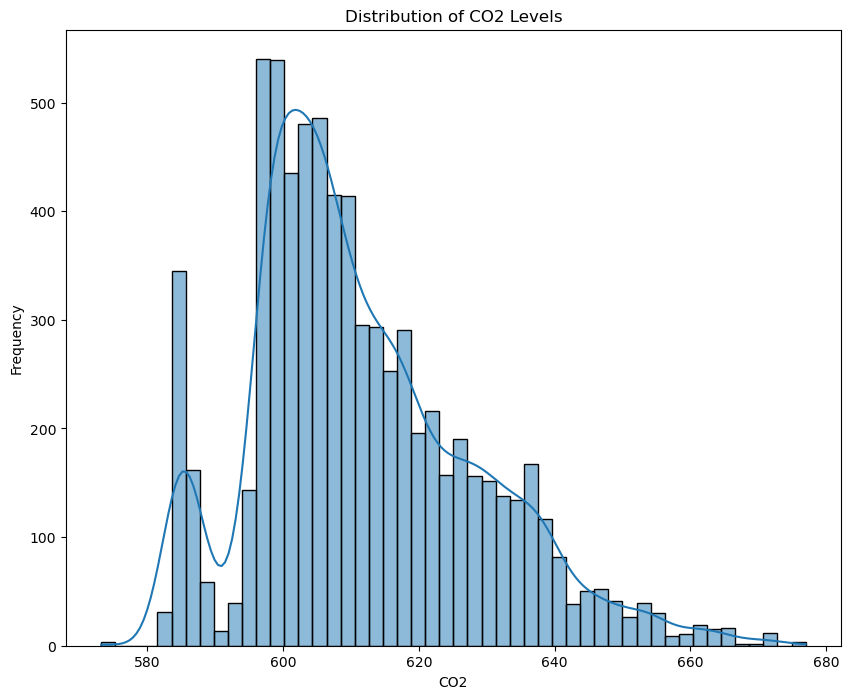

In [10]:
# Visualize distributions
plt.figure(figsize=(10, 8))
sns.histplot(train_data['CO2'], bins=50, kde=True)
plt.title('Distribution of CO2 Levels')
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.show()

## 🔗 Correlation Analysis 🔍

Here, we examine the relationships between numerical features in the dataset:

- **`train_data.select_dtypes(include=['float64', 'int64']).corr()`**:  Filters the DataFrame `train_data` to include only the columns with data types `float64` and `int64`and computes pairwise correlations between features.
- **`sns.heatmap()`**: Visualizes the correlations in a heatmap for easy interpretation.
  - **`annot=False`**: Keeps the heatmap uncluttered by excluding correlation values.
  - **`cmap='coolwarm'`**: Uses a visually appealing color scheme.
- **Customization**: Adjusts figure size and adds a title for clarity.

This step helps us identify highly correlated features, which can influence feature selection and model performance. 🚀

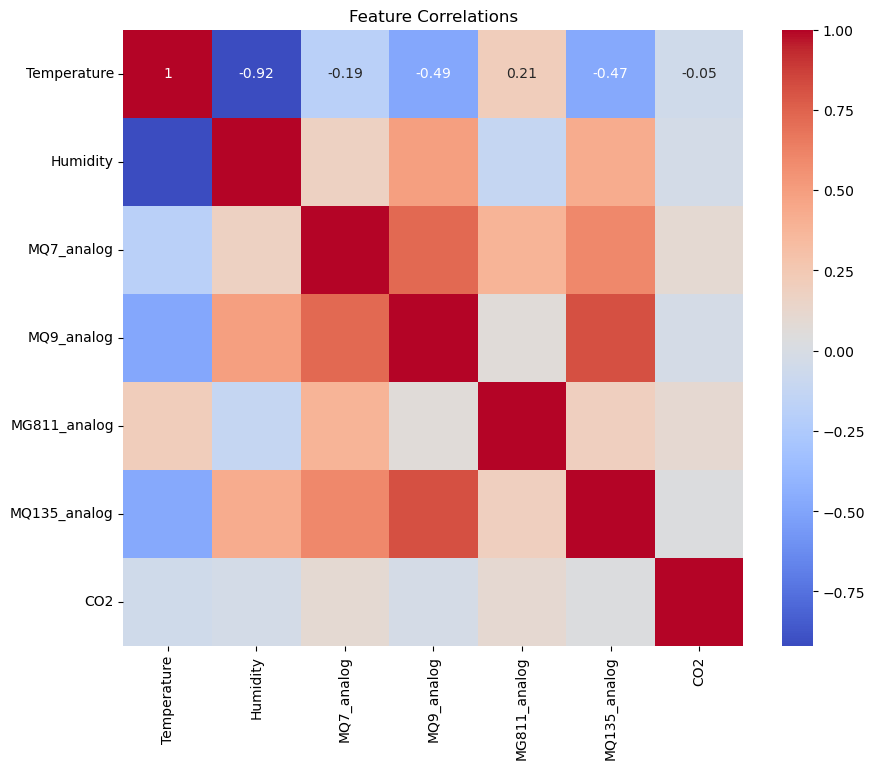

In [12]:
# Correlation heatmap
correlation_matrix = train_data.select_dtypes(include=['float64', 'int64']).corr()  # Only include numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

# Step 4: Feature Engineering
Based on the variable descriptions, we can create new features to improve model performance. For example:

**Ratios:**
- Combine sensor readings to capture relationships (e.g., MQ7_analog / MQ9_analog). To prevent division by zero errors, a small constant (`1e-6`) is added to the denominator (`train_data['MQ9_analog']`). This ensures that if `'MQ9_analog'` is zero, the denominator will not be zero, thus avoiding any potential runtime errors.
  
**Differences:**
- Compute differences between sensor readings (e.g., MG811_analog - MQ135_analog).
  
**Interaction Features:**
- Multiply or divide features to capture non-linear relationships.

In [14]:
# Example: Create interaction features
train_data['Alpha_Beta_Ratio'] = train_data['MQ7_analog'] / (train_data['MQ9_analog'] + 1e-6)
train_data['Beta_Charlie_Diff'] = train_data['MQ9_analog'] - train_data['MG811_analog']
train_data['MG811_MQ135_Diff'] = train_data['MG811_analog'] - train_data['MQ135_analog']

test_data['Alpha_Beta_Ratio'] = test_data['MQ7_analog'] / (test_data['MQ9_analog'] + 1e-6)
test_data['Beta_Charlie_Diff'] = test_data['MQ9_analog'] - test_data['MG811_analog']
test_data['MG811_MQ135_Diff'] = test_data['MG811_analog'] - test_data['MQ135_analog']

## Step 5: Train-Validation Split
Split the training data into training and validation sets to evaluate model performance. This separation is crucial for training machine learning models, ensuring a clear distinction between inputs and outputs.

## 🎯 Splitting Features and Target 📋

We separate the dataset into:

- **`X`**: The input features excluding ID, CO2, and device_name columns 🔢.
- **`y`**: The target variable, **CO2**, which we aim to predict 🌟.

This separation is crucial for training machine learning models, ensuring a clear distinction between inputs and outputs. 🚀

In [17]:
# Define features and target
X = train_data.drop(columns=['ID', 'CO2', 'device_name'])
y = train_data['CO2']


## ✂️ Train-Test Split 🔀

We divide the data into training and validation sets:

- **`train_test_split()`**: Splits the data into:
  - **`X_train`** & **`y_train`**: For training the model 🏋️.
  - **`X_val`** & **`y_val`**: For evaluating the model's performance 📏.
- **Parameters**:
  - **`test_size=0.2`**: Reserves 20% of the data for validation 🧪.
  - **`random_state=42`**: Ensures reproducibility with a fixed random seed 🔒.

This step ensures the model is trained on one set of data and tested on another, reducing the risk of overfitting. 🚀

In [19]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Baseline Model
Start with a simple model (e.g. Random Forest) to establish a baseline RMSE.

## Random Forest🚀

We train a **Random Forest Regressor** to predict CO2 levels:

- **`RandomForestRegressor`**: A powerful ensemble-based model that combines multiple decision trees 🌟.
- **Parameters**:
  - **`random_state=42`**: Ensures reproducibility by setting a fixed random seed 🔒.
  - **`n_estimators=100`**: Uses 100 trees in the forest for robust predictions 🌲.

- **`fit(X_train, y_train)`**: Trains the model on the training dataset 🏋️.

This model is well-suited for handling complex patterns in data while reducing overfitting risks. 🌟

In [22]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Step 7: Advanced Model
Experiment with gradient boosting models like XGBoost for better performance.

In [24]:
# Train XGBoost model
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## Step 8: Validation and Cross-Validation

#### 🧪 Model Validation 📏

We evaluate the trained model's performance on the validation set:

- **`model.predict(X_val)`**: Generates predictions for the validation data 🔮.
- **`mean_squared_error(y_val, val_predictions)`**: Computes the Mean Squared Error (MSE) between actual and predicted values 🧮.
- **`np.sqrt()`**: Calculates the Root Mean Squared Error (RMSE) for easier interpretation 🔢.

- **Output**:
  - The **Validation RMSE** indicates how well the model predicts CO2 levels on unseen data. Lower values are better! 📉

This step helps assess model accuracy and identify areas for improvement. 🚀

In [26]:
# Evaluate on validation set
y_pred_rf = rf_model.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
print(f'Random Forest Validation RMSE: {rmse_rf:.2f}')

y_pred_xgb = xgb_model.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
print(f'XGBoost Validation RMSE: {rmse_xgb:.2f}')

Random Forest Validation RMSE: 5.03
XGBoost Validation RMSE: 5.47


## Cross-Validation
This code performs k-fold cross-validation on a machine learning model using the following steps:

- **`KFold(n_splits=5, shuffle=True, random_state=42)`**: This line initializes a KFold object from the `sklearn.model_selection` module. It specifies that the dataset will be split into 5 folds (`n_splits=5`). The `shuffle=True` argument ensures that the data is shuffled before splitting, and `random_state=42` sets a seed for reproducibility.
- **`cross_val_score(xgb_model, X, y, scoring='neg_mean_squared_error', cv=kf)`**: This line calls the `cross_val_score` function to evaluate the model (`xgb_model`) using cross-validation. It takes the features (`X`) and target variable (`y`) as inputs. The `scoring='neg_mean_squared_error'` argument specifies that the negative mean squared error will be used as the scoring metric. The `cv=kf` argument indicates that the KFold object defined earlier will be used for splitting the data.
- **`cv_rmse = np.sqrt(-cv_scores)`**: This line calculates the root mean squared error (RMSE) from the cross-validation scores. Since the scores are negative (as specified in the scoring), it negates them and then takes the square root to obtain the RMSE.


This step helps in determining the mean RMSE and the standard deviation of the RMSE across the folds as well as providing an indication of the model's performance and variability.

In [28]:
# Perform k-fold cross-validation XGBoost
kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_cv_scores = cross_val_score(xgb_model, X, y, scoring='neg_mean_squared_error', cv=kf)
xgb_cv_rmse = np.sqrt(-xgb_cv_scores)
print(f'XGB Cross-Validation RMSE: {xgb_cv_rmse.mean()} ± {xgb_cv_rmse.std()}')

XGB Cross-Validation RMSE: 5.773160671869993 ± 0.3486451441037884


In [29]:
# Perform k-fold cross-validation for Random Forest
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=kf)
rf_cv_rmse = np.sqrt(-rf_cv_scores)
print(f'Random Forest Cross-Validation RMSE: {rf_cv_rmse.mean()} ± {rf_cv_rmse.std()}')

Random Forest Cross-Validation RMSE: 5.37920326890765 ± 0.35407870866507957


## Step 9: Generate Predictions
Use the trained model that performed better, which is Random Forest, to predict CO2 levels for the test set and format the submission file.

In [31]:
# Predict on test set
test_X = test_data.drop(columns=['ID', 'device_name'])
rf_test_predictions = rf_model.predict(test_X)

## Step 10: Submission

Format our predictions for submission to the Zindi competition:

- sample_submission['CO2']: Updates the CO2 column with the predicted values from the test dataset 🌟.

- to_csv('submission.csv', index=False): Saves the updated dataframe as a CSV file named submission.csv 📁.

- Output:

Prints a confirmation message: "Submission file created successfully!.

In [33]:
# Create submission file
submission = pd.DataFrame({'ID': test_data['ID'], 'CO2': rf_test_predictions})
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!
